In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
google = pd.read_csv('data/google.csv')

In [3]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1094 non-null   object 
 1   Close   756 non-null    float64
dtypes: float64(1), object(1)
memory usage: 17.2+ KB


In [4]:
google.head()

,Date,Close
0,2014-01-02,556.00
1,2014-01-03,551.95
2,2014-01-04,NaN
3,2014-01-05,NaN
4,2014-01-06,558.10


In [5]:
google.Date = pd.to_datetime(google.Date)

In [6]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1094 non-null   datetime64[ns]
 1   Close   756 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.2 KB


In [7]:
google.set_index('Date', inplace=True)

In [8]:
google.head()

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10


In [9]:
google = google.asfreq('B')

In [10]:
google[google.Close.isnull()]

,Close
Date,
2014-01-20,NaN
2014-02-17,NaN
2014-04-18,NaN
2014-05-26,NaN
2014-07-04,NaN
2014-09-01,NaN
2014-11-27,NaN
2014-12-25,NaN
2015-01-01,NaN


In [11]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 782 entries, 2014-01-02 to 2016-12-30
Freq: B
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 12.2 KB


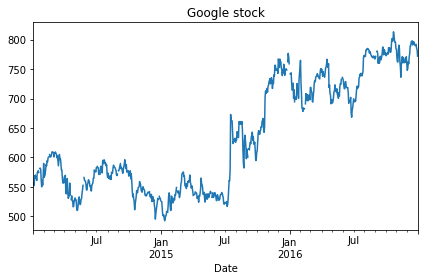

In [12]:
google.Close.plot(title='Google stock')
plt.style.use('ggplot')
plt.tight_layout()

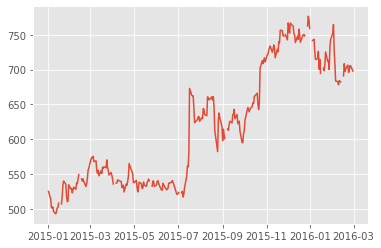

In [13]:
plt.plot(google.Close['2015-1':'2016-2'])

In [14]:
google['pct_change'] = google.Close.pct_change().mul(100) 

In [15]:
google.head()

,Close,pct_change
Date,,
2014-01-02,556.00,NaN
2014-01-03,551.95,-0.728417
2014-01-06,558.10,1.114231
2014-01-07,568.86,1.927970
2014-01-08,570.04,0.207432


In [16]:
plt.rcParams["figure.figsize"] = (20,4)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001862722B0C8>,
      dtype=object)

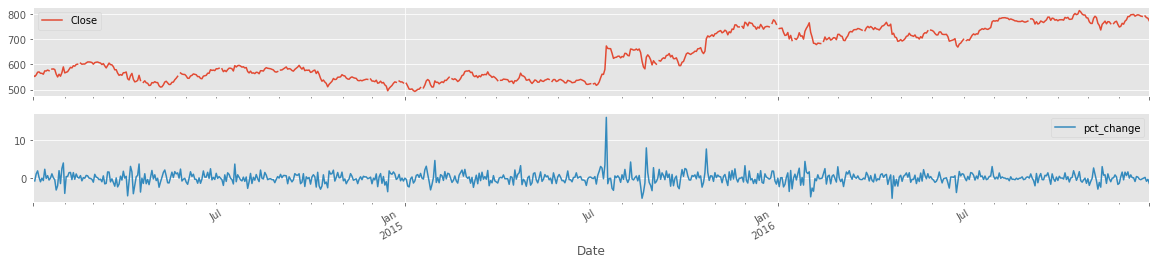

In [17]:
google.plot(subplots=True)

In [18]:
google['shift'] = google.Close.shift(periods=1)

In [19]:
google['lag'] = google.Close.shift(periods=-1)

In [20]:
google.head()

,Close,pct_change,shift,lag
Date,,,,
2014-01-02,556.00,NaN,NaN,551.95
2014-01-03,551.95,-0.728417,556.00,558.10
2014-01-06,558.10,1.114231,551.95,568.86
2014-01-07,568.86,1.927970,558.10,570.04
2014-01-08,570.04,0.207432,568.86,564.55


In [21]:
google.tail()

,Close,pct_change,shift,lag
Date,,,,
2016-12-26,NaN,0.000000,789.91,791.55
2016-12-27,791.55,0.207619,NaN,785.05
2016-12-28,785.05,-0.821174,791.55,782.79
2016-12-29,782.79,-0.287880,785.05,771.82
2016-12-30,771.82,-1.401398,782.79,NaN


In [22]:
google['Change_30'] = google.Close.diff(periods=30)

In [23]:
google.tail()

,Close,pct_change,shift,lag,Change_30
Date,,,,,
2016-12-26,NaN,0.000000,789.91,791.55,NaN
2016-12-27,791.55,0.207619,NaN,785.05,33.06
2016-12-28,785.05,-0.821174,791.55,782.79,20.57
2016-12-29,782.79,-0.287880,785.05,771.82,11.56
2016-12-30,771.82,-1.401398,782.79,NaN,11.28


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001862758AEC8>,
      dtype=object)

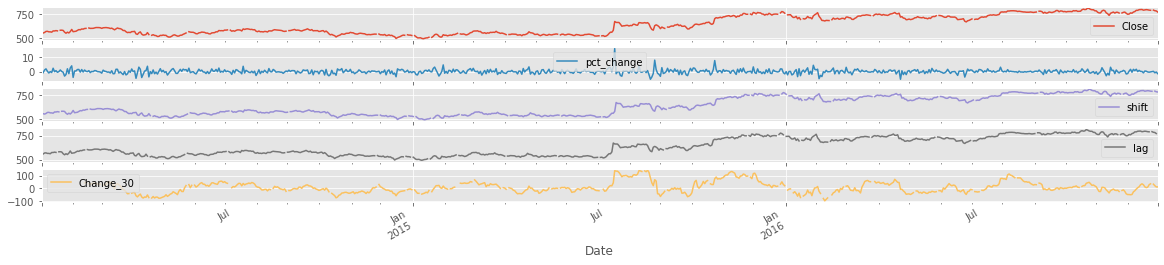

In [24]:
google.plot(subplots=True)

In [25]:
facebook = pd.read_csv('data/fb.csv', names=['date', 'Close'], index_col='date', parse_dates=True)

In [26]:
facebook.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1267 entries, 2012-05-17 to 2017-05-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1267 non-null   float64
dtypes: float64(1)
memory usage: 19.8 KB


In [27]:
facebook['pct_change'] = facebook.Close.pct_change().mul(100)

In [28]:
facebook.head()

,Close,pct_change
date,,
2012-05-17,38.00,NaN
2012-05-18,38.23,0.605263
2012-05-21,34.03,-10.986137
2012-05-22,31.00,-8.903908
2012-05-23,32.00,3.225806


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001862779B708>,
      dtype=object)

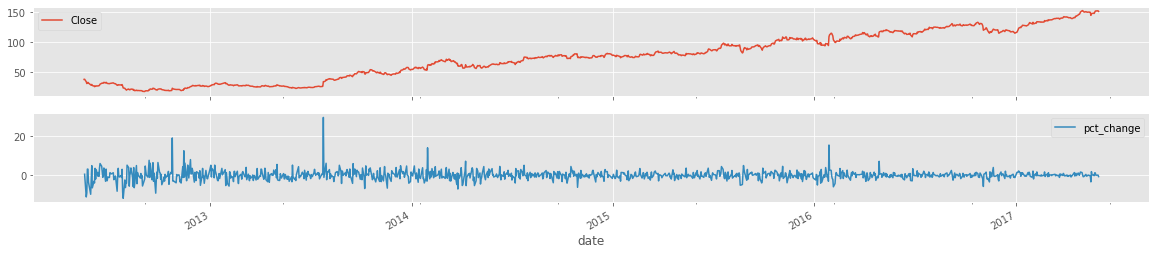

In [29]:
facebook.plot(subplots=True)

In [30]:
facebook['monthly'] = facebook.Close.diff(periods=30)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000018627876448>,
      dtype=object)

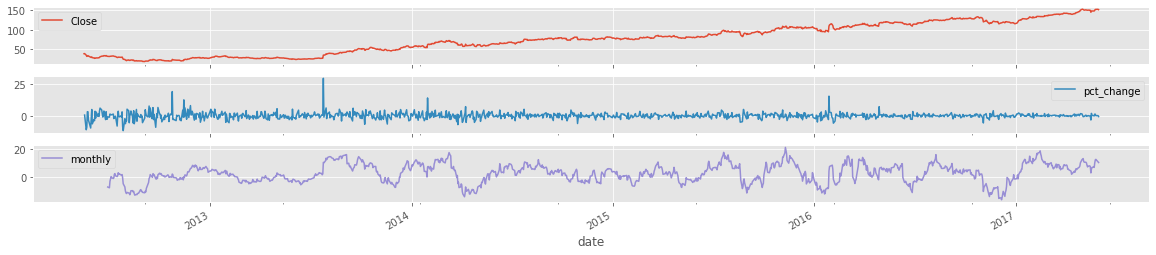

In [31]:
facebook.plot(subplots=True)

In [32]:
facebook.resample('W').first()


,Close,pct_change,monthly
date,,,
2012-05-20,38.00,0.605263,NaN
2012-05-27,34.03,-10.986137,NaN
2012-06-03,28.84,-9.620809,NaN
2012-06-10,26.90,-2.958153,NaN
2012-06-17,27.00,-0.369004,NaN
...,...,...,...
2017-05-07,152.46,1.470882,12.62
2017-05-14,151.06,0.545793,10.72
2017-05-21,150.19,-0.093128,8.14


In [33]:
first_price = facebook.Close.iloc[0]

In [34]:
first_price

38.0

In [39]:
normalize = facebook.Close.div(first_price).mul(100)

## This normalizes the data and makes it start at 100 so now it's easier to say that facebook stock has increased 4x from 2012

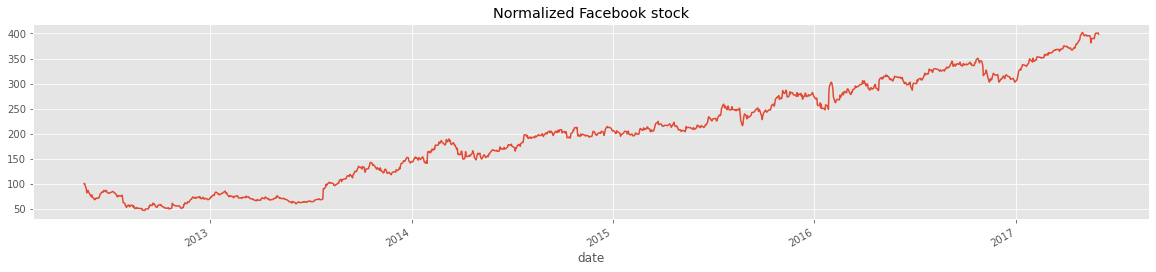

In [40]:
normalize.plot(title='Normalized Facebook stock')